<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/ChangeDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantile Transforms

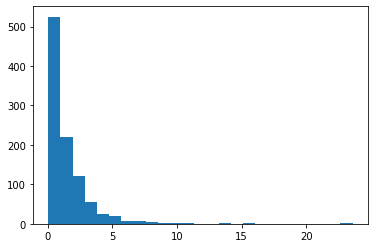

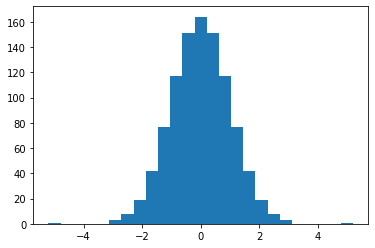

In [3]:
# demonstration of the quantile transform
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot

# gererate gaussian data sample
data = randn(1000)
# add a skew to the data distribution
data = exp(data)
# histogram of the raw data with a skew
pyplot.hist(data, bins=25)
pyplot.show()
# reshape data to have rows and columns
data = data.reshape((len(data),1))
# quantile transform the raw data
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(data)
# histogram of data transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()


# Sonar Dataset

(208, 61)
               0           1           2   ...          57          58          59
count  208.000000  208.000000  208.000000  ...  208.000000  208.000000  208.000000
mean     0.029164    0.038437    0.043832  ...    0.007949    0.007941    0.006507
std      0.022991    0.032960    0.038428  ...    0.006470    0.006181    0.005031
min      0.001500    0.000600    0.001500  ...    0.000300    0.000100    0.000600
25%      0.013350    0.016450    0.018950  ...    0.003600    0.003675    0.003100
50%      0.022800    0.030800    0.034300  ...    0.005800    0.006400    0.005300
75%      0.035550    0.047950    0.057950  ...    0.010350    0.010325    0.008525
max      0.137100    0.233900    0.305900  ...    0.044000    0.036400    0.043900

[8 rows x 60 columns]


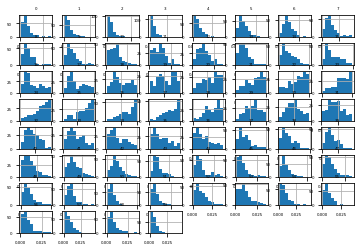

In [4]:
# load and summarize the sonar dataset
from pandas import read_csv
from matplotlib import pyplot
# laod dataset
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv', header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

(20665, 8)
               850nm          640nm  ...  Channel 7  Channel 8
count   20665.000000   20665.000000  ...    20665.0    20665.0
mean   817663.068764 -777540.398306  ...        0.0        0.0
std     26649.696060   13677.458630  ...        0.0        0.0
min         0.000000 -823380.000000  ...        0.0        0.0
25%    808706.000000 -785469.000000  ...        0.0        0.0
50%    826957.000000 -773174.000000  ...        0.0        0.0
75%    834737.000000 -767922.000000  ...        0.0        0.0
max    857234.000000 -752898.000000  ...        0.0        0.0

[8 rows x 8 columns]


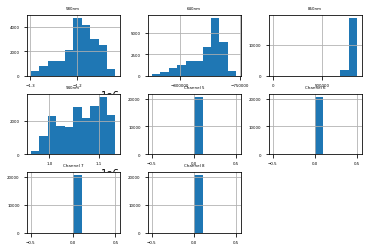

In [17]:
dataset2 = read_csv('drive/My Drive/InvertPhaseLong2.csv', header=0)

print(dataset2.shape)

print(dataset2.describe())

# histograms of the variables
fig1 = dataset2.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig1.ravel()]
# show the plot
pyplot.show()

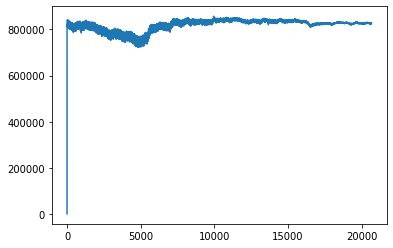

In [23]:
x = dataset2.values[:,0]
pyplot.plot(x)

Evaluate with K-NN classifier with raw data

In [24]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# load dataset
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv',header=None)
data = dataset.values
# seperate into input and output columns
X, y = data[:,:-1], data[:,-1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.797 (0.073)


# Normal Quantile Transform

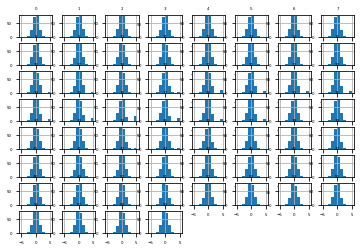

In [29]:
# vissualize a normal quantile transofrm of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot
# load dataset
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv',header=None)
# retrieve just the numeric input values
data = dataset.values[:,:-1]
# perform a normal quantile transform of the dataset
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
pyplot.show()

Evaluate the model after Quantile Transform

In [30]:
from pandas import read_csv
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline

#load dataset
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv',header=None)
data = dataset.values
# seperate into input and output columns
X, y = data[:,:-1], data[:,-1]
# ensure inputs and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans),('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline perforamance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.817 (0.087)


Uniform Quantile Transform 

In [34]:
# perform a uniform quantile transform of the dataset
from pandas import read_csv
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
#load dataset
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv',header=None)
data = dataset.values
# seperate into input and output columns
X, y = data[:,:-1], data[:,-1]
# ensure inputs and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans),('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1)
n_scores = cross_val_score(pipeline,X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' %(mean(n_scores),std(n_scores)))


Accuracy: 0.845 (0.074)
